In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#imports
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot


ValueError: ignored

In [0]:
# load data


(train_X, train_Y), (test_X, test_Y) = load_data()



11493376/11490434 [==============================] - 1s 0us/step


In [0]:
# image to vector

from keras.utils import to_categorical
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1] * train_X.shape[2])
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1] * test_X.shape[2])
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

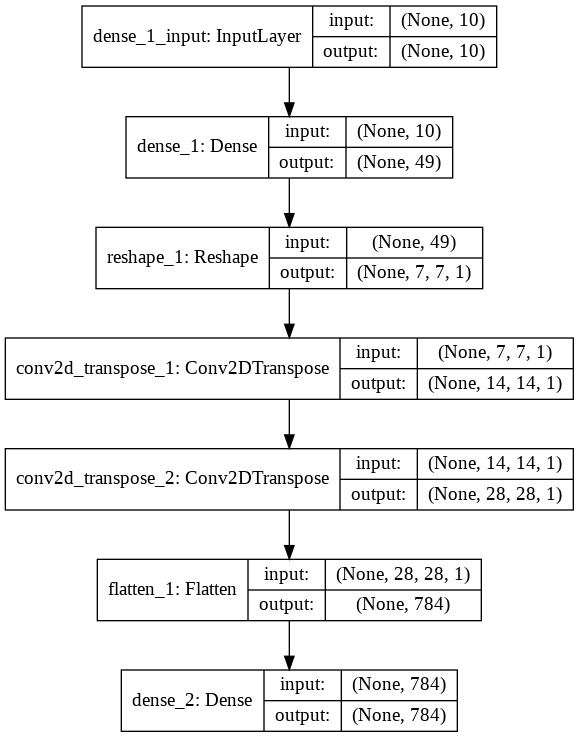

In [0]:
# model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2DTranspose
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Dense(1 * 7 * 7, input_dim=10))
model.add(Reshape((7, 7, 1)))
model.add(Conv2DTranspose(1, (3,3), strides=(2,2), padding='same'))
model.add(Conv2DTranspose(1, (3,3), strides=(2,2), padding='same'))
model.add(Flatten())
model.add(Dense(784, activation='softmax'))
plot_model(model, to_file='/content/gdrive/My Drive/Projects/text_to_image/One_hot_to_Image_CNN_architectue.png', show_shapes=True, show_layer_names=True)

In [0]:
#train
from keras.callbacks import ModelCheckpoint
filepath="/content/gdrive/My Drive/Projects/text_to_image/One_hot_to_Image_CNN_weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(train_Y,train_X, batch_size=32, epochs=100, callbacks = callbacks_list)
model.save("/content/gdrive/My Drive/Projects/text_to_image/model.h5")

Epoch 1/100
60000/60000 [==============================] - 13s 218us/step - loss: 146925.1404 - acc: 0.0131

Epoch 00001: acc improved from -inf to 0.01313, saving model to /content/gdrive/My Drive/Projects/text_to_image/One_hot_to_Image_CNN_weights.best.hdf5
Epoch 2/100
60000/60000 [==============================] - 13s 213us/step - loss: 146923.8679 - acc: 0.0138

Epoch 00002: acc improved from 0.01313 to 0.01378, saving model to /content/gdrive/My Drive/Projects/text_to_image/One_hot_to_Image_CNN_weights.best.hdf5
Epoch 3/100
60000/60000 [==============================] - 13s 212us/step - loss: 146921.8953 - acc: 0.0121

Epoch 00003: acc did not improve from 0.01378
Epoch 4/100
60000/60000 [==============================] - 13s 209us/step - loss: 146921.9736 - acc: 0.0132

Epoch 00004: acc did not improve from 0.01378
Epoch 5/100
60000/60000 [==============================] - 13s 211us/step - loss: 146920.1449 - acc: 0.0128

Epoch 00005: acc did not improve from 0.01378
Epoch 6/100


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


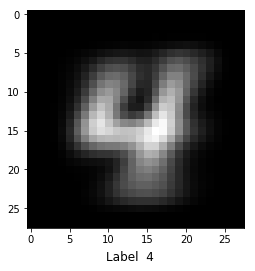

In [0]:
%matplotlib inline
import numpy as np
index = 20
print(train_Y[index])
label = train_Y[index].reshape(1,10)
#data = [0.,0.,0.,1.,0.,0.,0.,0.,0.,0.]
#label = np.array(data).reshape(1,10)
y_pred = model.predict(label)
import matplotlib.pyplot as plt
plt.imshow(y_pred.reshape(28,28), cmap='gray')
plt.figtext(0.5, 0.01, "Label %2d" %np.argmax(train_Y[index], axis=None, out=None), wrap=True, horizontalalignment='center', fontsize=12)
plt.show()
